# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [42]:
weather_api_key


'ddf6498b2f217c14c28f9caa370fbb82'

### Generate the Cities List by Using the `citipy` Library

In [43]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


In [44]:
lats

array([  9.56811598, -18.61801482, -22.72544038, ...,  50.42581391,
         5.95375977, -26.93365461])

In [45]:
cities

['cochin',
 'cable beach',
 'calama',
 'port-aux-francais',
 'adamstown',
 'afonso claudio',
 'vallenar',
 'thompson',
 'tulsipur',
 'boa vista',
 'iskateley',
 'el calafate',
 'kerikeri',
 'margaret river',
 'port mathurin',
 'alice springs',
 'port augusta',
 'talnakh',
 'longyearbyen',
 'petropavlovsk-kamchatsky',
 'la passe',
 'taiohae',
 'hamilton',
 'hermanus',
 'edinburgh of the seven seas',
 'kavieng',
 'bam',
 'isangel',
 'recani',
 'tiksi',
 'floro',
 'waitangi',
 'yeraliyev',
 'kalmunai',
 'vernon',
 'sangmelima',
 'hilo',
 'yellowknife',
 'ancud',
 'antonio enes',
 'at taj',
 'enewetak',
 'sandnessjoen',
 'tazovsky',
 'happy valley-goose bay',
 'west island',
 'bethel',
 'santa terezinha',
 'bilibino',
 'chom thong',
 'gadzhiyevo',
 'tura',
 'chelno-vershiny',
 'sorong',
 'ilulissat',
 'qaqortoq',
 'heunghae',
 'shenjiamen',
 'hadibu',
 'bredasdorp',
 'genhe',
 'lata',
 'agat village',
 'kingscliff',
 'zhezqazghan',
 'fale old settlement',
 'zelenoborskiy',
 'anadyr',
 'nyu

In [46]:
lngs

array([ 75.21875938, 121.34387107, -69.20851638, ..., -54.66913319,
       175.99994087,  10.36116037])

In [47]:
lat_lng[0]

-26.933654606621474

In [48]:
lat_lng[1]

10.361160366547693

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [49]:
#weather_api_key
#http://api.openweathermap.org/data/2.5/weather?q=Paris&appid=ddf6498b2f217c14c28f9caa370fbb82&units=metric

In [70]:
# Set the API base URL
# url = "http://api.openweathermap.org/data/2.5/weather?q={city}&appid={config.API_KEY}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()
        print(json.dumps(city_weather, indent=4, sort_keys=True))

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_weather['coord']['lat']
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']["all"]
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

     
    # If an error is experienced, skip the city
    except:

        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cochin
{
    "base": "stations",
    "clouds": {
        "all": 100
    },
    "cod": 200,
    "coord": {
        "lat": 9.9399,
        "lon": 76.2602
    },
    "dt": 1728505643,
    "id": 1273874,
    "main": {
        "feels_like": 24.66,
        "grnd_level": 1008,
        "humidity": 85,
        "pressure": 1008,
        "sea_level": 1008,
        "temp": 23.99,
        "temp_max": 23.99,
        "temp_min": 23.99
    },
    "name": "Kochi",
    "rain": {
        "1h": 1.33
    },
    "sys": {
        "country": "IN",
        "id": 9211,
        "sunrise": 1728520987,
        "sunset": 1728564026,
        "type": 1
    },
    "timezone": 19800,
    "visibility": 7128,
    "weather": [
        {
            "description": "moderate rain",
            "icon": "10n",
            "id": 501,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 176,
        "gust": 1.7,
      

Processing Record 2 of Set 1 | cable beach
{
    "cod": "404",
    "message": "city not found"
}
City not found. Skipping...
Processing Record 3 of Set 1 | calama
{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": -22.4667,
        "lon": -68.9333
    },
    "dt": 1728505645,
    "id": 3897347,
    "main": {
        "feels_like": 18.8,
        "grnd_level": 758,
        "humidity": 17,
        "pressure": 1013,
        "sea_level": 1013,
        "temp": 20.27,
        "temp_max": 20.27,
        "temp_min": 20.27
    },
    "name": "Calama",
    "sys": {
        "country": "CL",
        "id": 8480,
        "sunrise": 1728468497,
        "sunset": 1728513428,
        "type": 1
    },
    "timezone": -10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01d",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 300,
   

In [71]:
# Convert the cities weather data into a Pandas DataFrame
#city_data_df
    
# Show Record Count
city_data_df= pd.DataFrame(city_data)

In [72]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cochin,9.9399,76.2602,23.99,85,100,1.45,IN,1728505643
1,calama,-22.4667,-68.9333,20.27,17,0,11.83,CL,1728505645
2,port-aux-francais,-49.3500,70.2167,0.64,54,100,11.30,TF,1728505647
3,adamstown,-25.0660,-130.1015,20.33,74,46,7.84,PN,1728505648
4,afonso claudio,-20.0742,-41.1239,25.84,82,57,4.26,BR,1728505649


In [73]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [5]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cochin,9.9399,76.2602,23.99,85,100,1.45,IN,1728505643
1,calama,-22.4667,-68.9333,20.27,17,0,11.83,CL,1728505645
2,port-aux-francais,-49.3500,70.2167,0.64,54,100,11.30,TF,1728505647
3,adamstown,-25.0660,-130.1015,20.33,74,46,7.84,PN,1728505648
4,afonso claudio,-20.0742,-41.1239,25.84,82,57,4.26,BR,1728505649


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [6]:
lat=city_data_df["Lat"]
Maxtemp=city_data_df["Max Temp"]

lat.head()


City_ID
0     9.9399
1   -22.4667
2   -49.3500
3   -25.0660
4   -20.0742
Name: Lat, dtype: float64

In [76]:
#ex
?plt.scatter
    

Signature:
plt.scatter(
    x: 'float | ArrayLike',
    y: 'float | ArrayLike',
    s: 'float | ArrayLike | None' = None,
    c: 'ArrayLike | Sequence[ColorType] | ColorType | None' = None,
    marker: 'MarkerType | None' = None,
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    alpha: 'float | None' = None,
    linewidths: 'float | Sequence[float] | None' = None,
    *,
    edgecolors: "Literal['face', 'none'] | ColorType | Sequence[ColorType] | None" = None,
    plotnonfinite: 'bool' = False,
    data=None,
    **kwargs,
) -> 'PathCollection'
Docstring:
A scatter plot of *y* vs. *x* with varying marker size and/or color.

Parameters
----------
x, y : float or array-like, shape (n, )
    The data positions.

s : float or array-like, shape (n, ), optional
    The marker size in points**2 (typographic points are 1/72 in.).
    Default is ``rcParams['lines.markersize'] ** 2``.

    Th

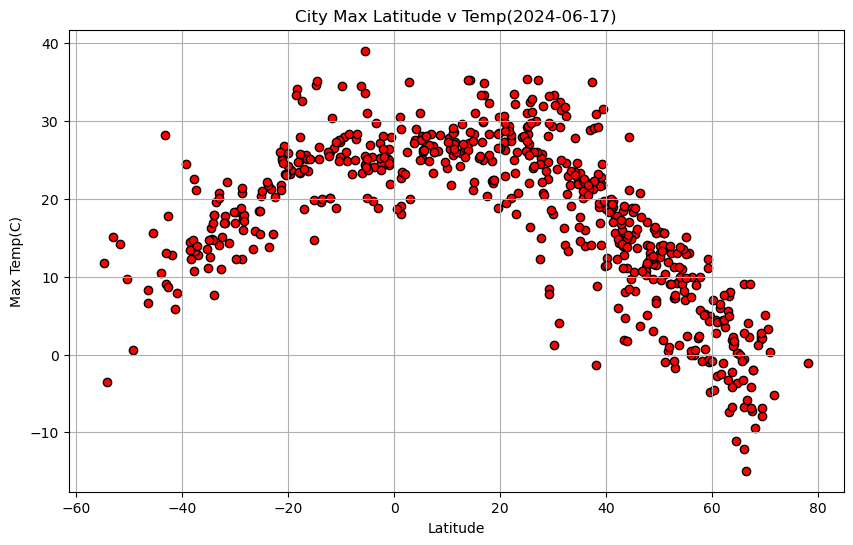

In [7]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))

plt.scatter(
    x=lat, 
    y=Maxtemp, 
    marker="o",
    facecolors="red",
    edgecolors="black",
)
plt.title("City Max Latitude v Temp(2024-06-17)"),
plt.xlabel("Latitude"),
plt.ylabel("Max Temp(C)"),
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

plt.show()


In [ ]:
dir(plt)

['AbstractContextManager',
 'Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'AxLine',
 'Axes',
 'Button',
 'Circle',
 'Enum',
 'ExitStack',
 'Figure',
 'FigureBase',
 'FigureCanvasBase',
 'FigureManagerBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'TYPE_CHECKING',
 'Text',
 'TickHelper',
 'Widget',
 '_REPL_DISPLAYHOOK',
 '_ReplDisplayHook',
 '__annotations__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_color_sequences',
 '_colormaps',
 '_copy_docstring_and_

#### Latitude Vs. Humidity

In [8]:
#city_data_df

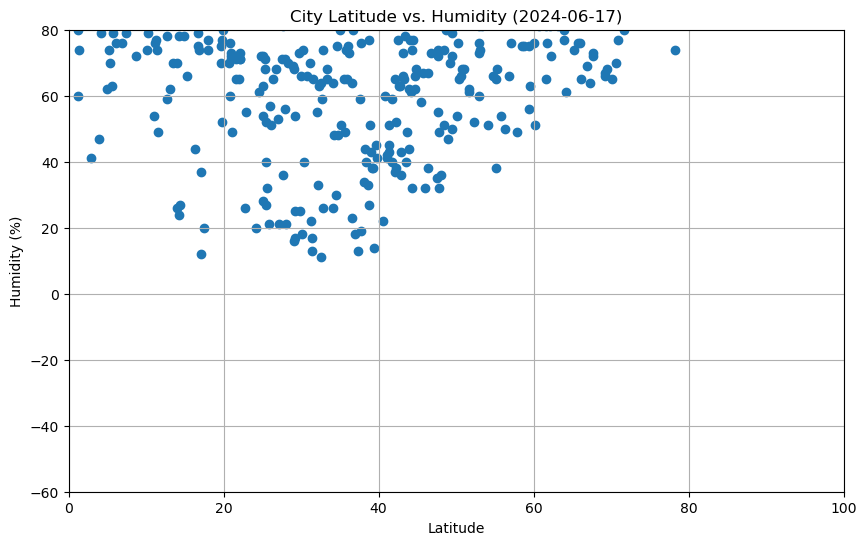

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o')
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(0, 100)  # Set x-axis limits
plt.ylim(-60, 80)  # Set y-axis limits
plt.grid(True)
#plt.show()

#x_limit = 100
#x_axis = np.arange(0, x_limit, 1)
#plt.scatter(x_axis, data, marker="o", facecolors="red", edgecolors="black",
#            s=x_axis, alpha=0.75)
#plt.show()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

In [11]:

Cloudiness=city_data_df["Cloudiness"]


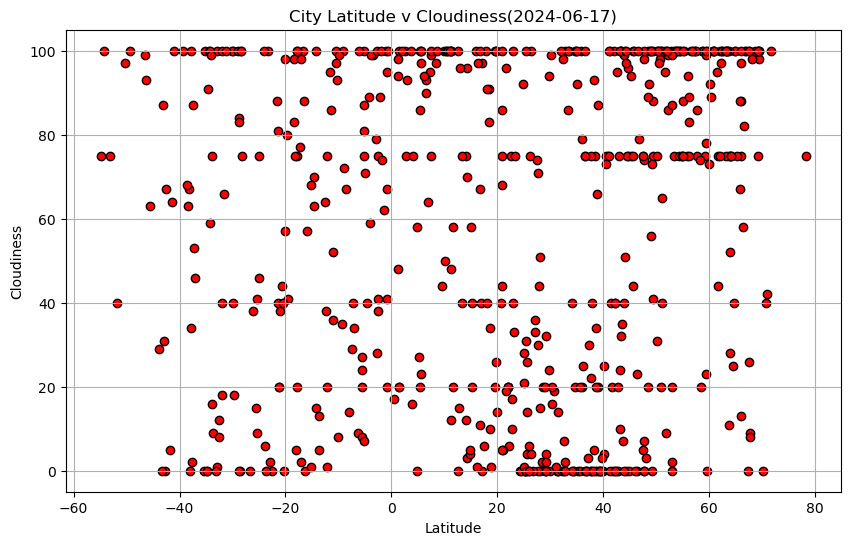

['AbstractContextManager',
 'Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'AxLine',
 'Axes',
 'Button',
 'Circle',
 'Enum',
 'ExitStack',
 'Figure',
 'FigureBase',
 'FigureCanvasBase',
 'FigureManagerBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'TYPE_CHECKING',
 'Text',
 'TickHelper',
 'Widget',
 '_REPL_DISPLAYHOOK',
 '_ReplDisplayHook',
 '__annotations__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_color_sequences',
 '_colormaps',
 '_copy_docstring_and_

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))

plt.scatter(
    x=lat, 
    y=Cloudiness, 
    marker="o",
    facecolors="red",
    edgecolors="black",
)
plt.title("City Latitude v Cloudiness(2024-06-17)"),
plt.xlabel("Latitude"),
plt.ylabel("Cloudiness"),
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

plt.show()
dir(plt)


#### Latitude vs. Wind Speed Plot

In [13]:

WindSpeed=city_data_df["Wind Speed"]

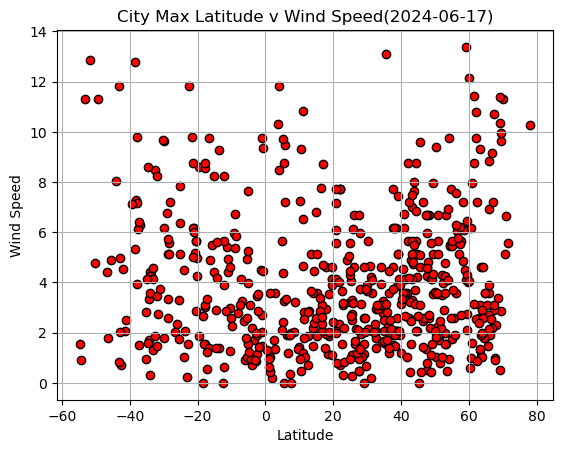

['AbstractContextManager',
 'Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'AxLine',
 'Axes',
 'Button',
 'Circle',
 'Enum',
 'ExitStack',
 'Figure',
 'FigureBase',
 'FigureCanvasBase',
 'FigureManagerBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'TYPE_CHECKING',
 'Text',
 'TickHelper',
 'Widget',
 '_REPL_DISPLAYHOOK',
 '_ReplDisplayHook',
 '__annotations__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_color_sequences',
 '_colormaps',
 '_copy_docstring_and_

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    x=lat, 
    y=WindSpeed, 
    marker="o",
    facecolors="red",
    edgecolors="black",
)
plt.title("City Max Latitude v Wind Speed(2024-06-17)"),
plt.xlabel("Latitude"),
plt.ylabel("Wind Speed"),
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

plt.show()
dir(plt)

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def liner_regression_plot(df, x_column, y_column, title):
        #scatter plot
    plt.figure(figsize=(9,6))
    x_values = df[x_column]
    y_values = df[y_column]

    #linear regression for temp vs lat
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    #regression values
    regress_values = x_values * slope + intercept

    #line equation string
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

    # Create plot:
    plt.scatter(x_values,y_values, marker='o', color='blue', s=[70], edgecolors='black')
    plt.plot(x_values,regress_values, 'pink', linewidth=2)

    #graph properties
    plt.title(title, fontsize=20)
    plt.ylabel(y_column, fontsize=16, color='black')
    plt.xlabel(x_column, fontsize=16, color='black')
    plt.annotate(line_eq,(1, 1), fontsize=18, color='red')
    #plt.grid(False)

    # imits  y axis:
    #plt.ylim(min(city_data['Max Temp (F)'])-10, max(city_data['Max Temp (F)'])+10)

    #limits x axis:
    #plt.xlim(-10, max(city_data['Lat'])+10)

    plt.savefig(f"output_data/{title}.png")

    # Show plot
    plt.show()

    # Print r^2 value
    print(f"The r^2-value is: {rvalue**2}")
    

In [95]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,cochin,9.9399,76.2602,23.99,85,100,1.45,IN,1728505643
1,calama,-22.4667,-68.9333,20.27,17,0,11.83,CL,1728505645
2,port-aux-francais,-49.3500,70.2167,0.64,54,100,11.30,TF,1728505647
3,adamstown,-25.0660,-130.1015,20.33,74,46,7.84,PN,1728505648
4,afonso claudio,-20.0742,-41.1239,25.84,82,57,4.26,BR,1728505649
...,...,...,...,...,...,...,...,...,...
587,corner brook,48.9667,-57.9484,12.68,94,100,5.59,CA,1728506323
588,murzuq,25.9155,13.9184,29.69,21,0,3.20,LY,1728506324
589,bugiri,0.5714,33.7417,18.72,83,17,1.32,UG,1728506325


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,calama,-22.4667,-68.9333,20.27,17,0,11.83,CL,1728505645
2,port-aux-francais,-49.3500,70.2167,0.64,54,100,11.30,TF,1728505647
3,adamstown,-25.0660,-130.1015,20.33,74,46,7.84,PN,1728505648
4,afonso claudio,-20.0742,-41.1239,25.84,82,57,4.26,BR,1728505649
5,vallenar,-28.5708,-70.7581,17.55,33,0,5.15,CL,1728505650


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,calama,-22.4667,-68.9333,20.27,17,0,11.83,CL,1728505645
2,port-aux-francais,-49.3500,70.2167,0.64,54,100,11.30,TF,1728505647
3,adamstown,-25.0660,-130.1015,20.33,74,46,7.84,PN,1728505648
4,afonso claudio,-20.0742,-41.1239,25.84,82,57,4.26,BR,1728505649
5,vallenar,-28.5708,-70.7581,17.55,33,0,5.15,CL,1728505650


###  Temperature vs. Latitude Linear Regression Plot

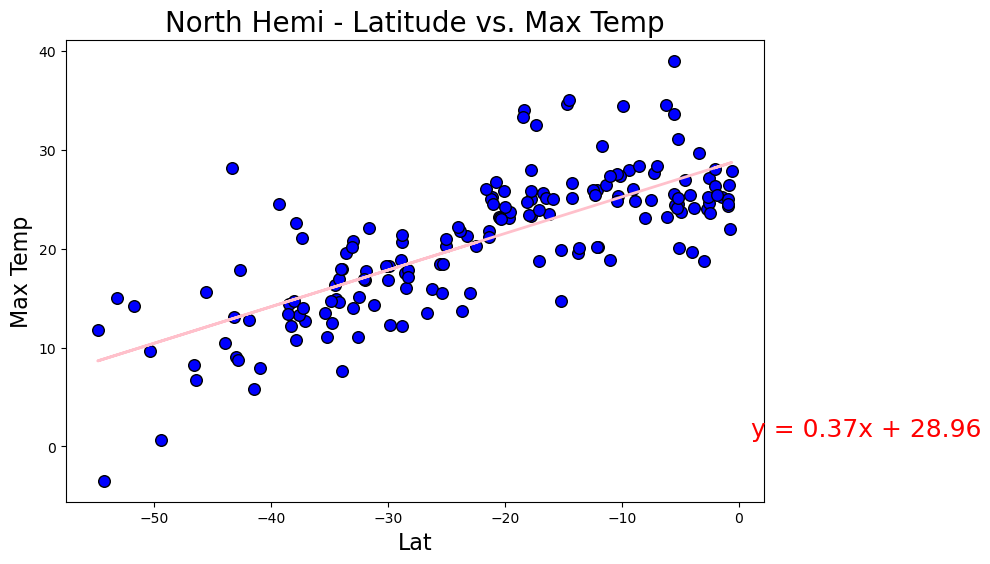

The r^2-value is: 0.5704894376424057


In [19]:
liner_regression_plot(northern_hemi_df, 'Lat', 'Max Temp', 'North Hemi - Latitude vs. Max Temp')

The r^2-value is: 0.5704894376424057


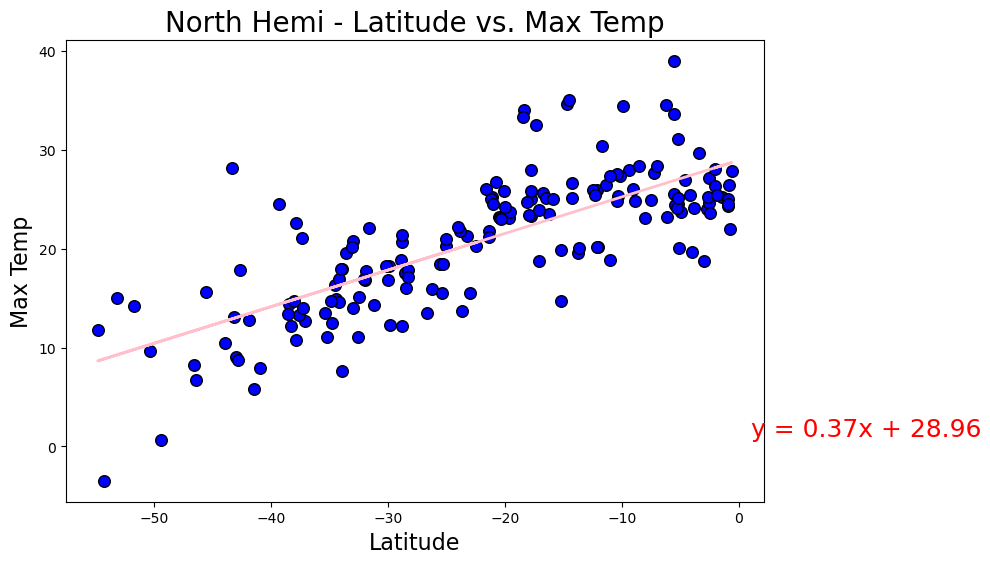

In [18]:
#scatter plot
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#linear regression for temp vs lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

#line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'pink', linewidth=2)

#graph properties
plt.title('North Hemi - Latitude vs. Max Temp', fontsize=20)
plt.ylabel('Max Temp', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=18, color='red')
#plt.grid(False)

# imits  y axis:
#plt.ylim(min(city_data_df['Max Temp'])-10, max(city_data_df['Max Temp'])+10)

#limits x axis:
#plt.xlim(-10, max(city_data_df['Lat'])+10)

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

The r^2-value is: 0.5704894376424057


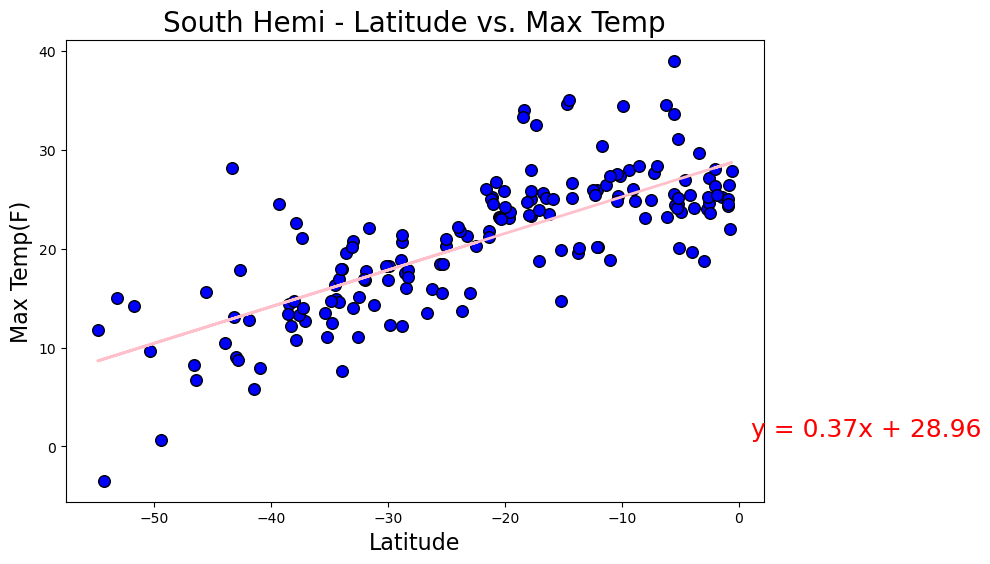

In [105]:
#scatter plot
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#linear regression for temp vs lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

#line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='blue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'pink', linewidth=2)

#graph properties
plt.title('South Hemi - Latitude vs. Max Temp', fontsize=20)
plt.ylabel('Max Temp', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=18, color='red')
#plt.grid(False)

# imits  y axis:
#plt.ylim(min(city_data['Max Temp (F)'])-10, max(city_data['Max Temp (F)'])+10)

#limits x axis:
#plt.xlim(-10, max(city_data['Lat'])+10)

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

The r^2-value is: 0.6720220238897325


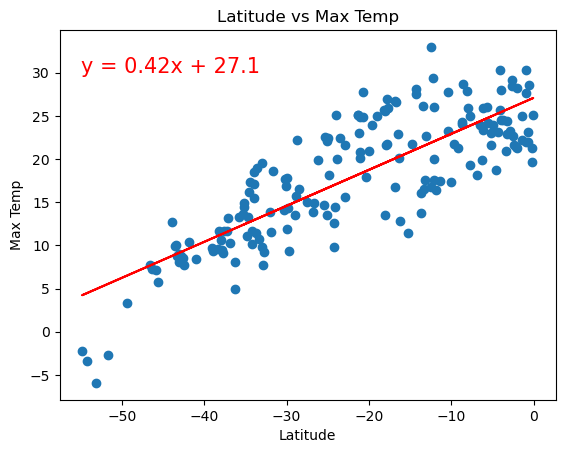

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern HemiLatitude vs Humidity ', fontsize=20)
plt.ylabel('Humidity', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(51,6),fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-6, 110)

# Set the limits of the x axis:
plt.xlim(-4, 82)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

The r^2-value is: 0.007659599322853922


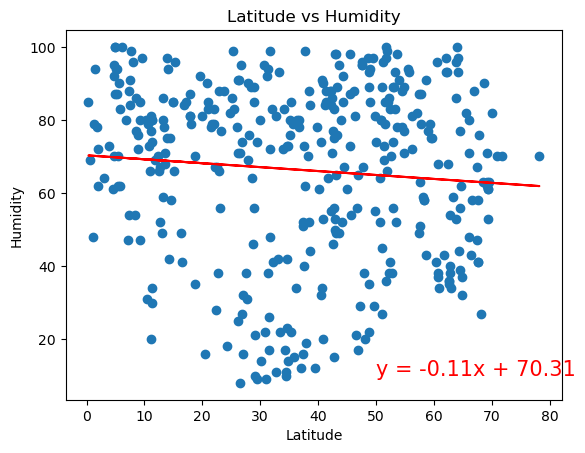

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE


In [ ]:
#scatter plot
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#linear regression for temp vs lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#regression values
regress_values = x_values * slope + intercept

#line equation string
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='deepblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'pink', linewidth=2)

#graph prop
plt.title('Latitude vs. Humidity', fontsize=20)
plt.ylabel('Max Temp(F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(1, 1), fontsize=18, color='darkred')
#plt.grid(False)

# imits  y axis:
plt.ylim(min(city_data['Humidity'])-10, max(city_data['Humidity'])+10)

#limits x axis:
plt.xlim(-10, max(city_data['Lat'])+10)

# Print r^2 value
print(f"The r^2-value is: {rvalue**2}")

The r^2-value is: 0.00014367159540169783


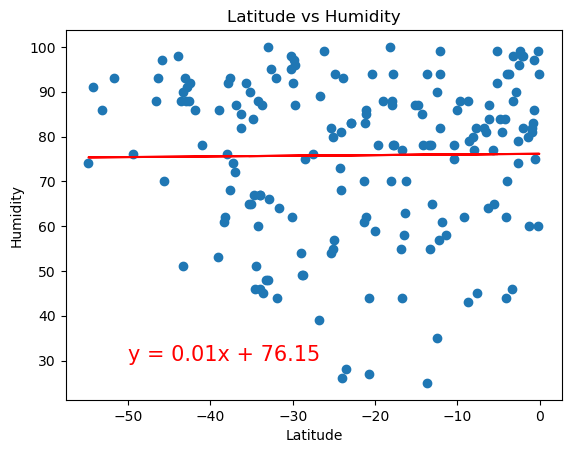

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern HemiLatitude vs Cloudiness ', fontsize=20)
plt.ylabel('Cloudiness', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(51,6),fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-6, 110)

# Set the limits of the x axis:
plt.xlim(-4, 82)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

The r^2-value is: 0.006456908379763574


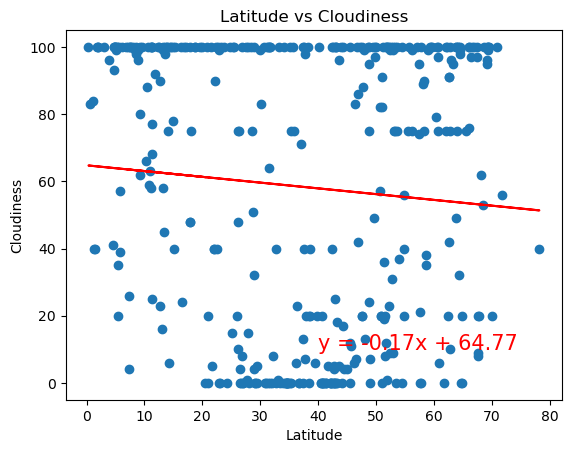

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r^2-value is: 0.018616831531634456


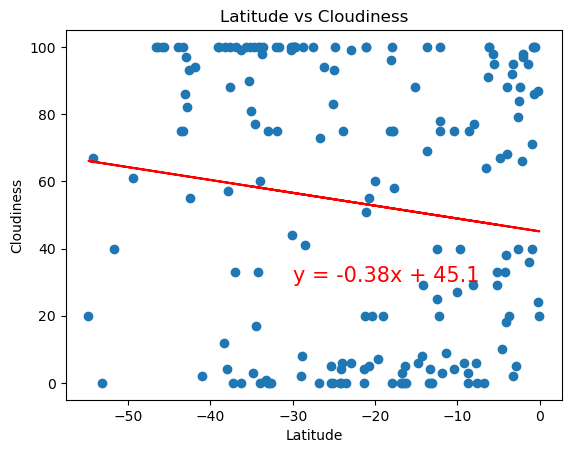

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemi Latitude vs Cloudiness ', fontsize=20)
plt.ylabel('Cloudiness', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(51,6),fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-6, 110)

# Set the limits of the x axis:
plt.xlim(-60, 1)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern HemiLatitude vs Wind Speed ', fontsize=20)
plt.ylabel('Wind Speed', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(51,6),fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-6, 15)

# Set the limits of the x axis:
plt.xlim(-4, 82)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

The r^2-value is: 0.0017236249523139959


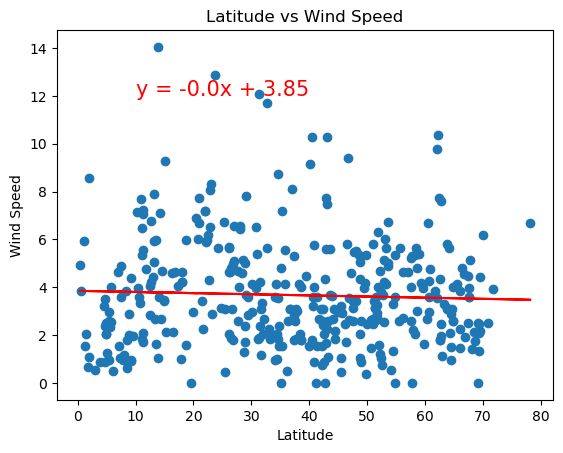

In [ ]:
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed ']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemi Latitude vs Wind Speed', fontsize=20)
plt.ylabel('Wind Speed ', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(51,6),fontsize=18, color='darkred')
#plt.grid(False)

# Set the limits of the y axis:
plt.ylim(-5, 25)

# Set the limits of the x axis:
plt.xlim(-60, 10)

# Print r-squared value:
print(f'The r-squared is: {round(rvalue**2,2)}')

The r^2-value is: 0.06495869418886388


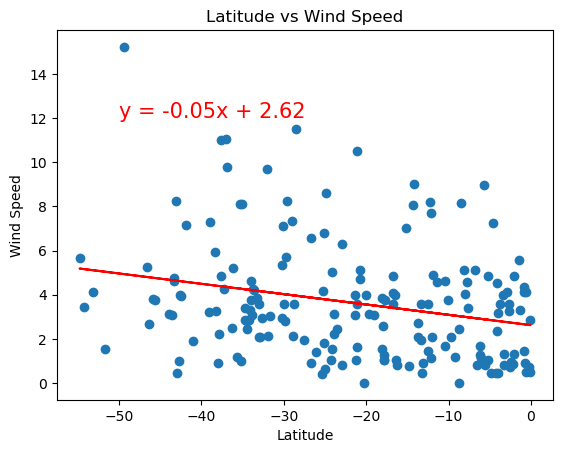

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE